In [22]:
################################################################################
############ Klasifikacija subjekata na osnovu vrste srcane insuficijencije ##############
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import seaborn as sns
from sklearn.feature_selection import RFE
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score, classification_report, ConfusionMatrixDisplay
import seaborn as sns


In [24]:
### Učitavanje podataka ###

data = pd.read_csv("C:/Users/masat/Desktop/ETRAN_2025/Datasets/patient_data_features_1.csv")
print(data)
print(np.unique(data['SS']))

            Name  LVET_median  LVET_mean    LVET_std    EF  PEP_median  \
0   Subject_1001        321.0     320.50    3.570714  44.0       193.0   
1   Subject_1002        318.0     301.20   83.470713  23.0       161.5   
2   Subject_1003        346.0     340.40   30.342050  61.0       194.0   
3   Subject_1004        304.0     337.60  116.367693  49.0       164.0   
4   Subject_1005        692.0     594.40  218.036327  56.0       194.0   
..           ...          ...        ...         ...   ...         ...   
74  Subject_2037        320.0     299.34   53.412193  55.0       112.0   
75  Subject_2038        416.0     412.00   12.066482  60.0       150.0   
76  Subject_2039        266.0     269.60    9.666437  50.0       108.0   
77  Subject_2040        602.0     535.60  140.521315  60.0       162.0   
78  Subject_2041        384.0     384.80    6.881860  60.0       152.2   

    PEP_mean     PEP_std   PEPLVET  age  sex   HR_median       HRV  height  \
0    192.875    3.129996  0.60124

In [25]:
data = data[~np.isnan(data['SS'])]
data = data[~np.isnan(data['EF'])]
print(np.unique(data['SS']))

data['sex'] = data['sex'] - 1
X = data.iloc[:,1:13]
print(X)
y = data['SS']
y_bin = y.copy()
y_bin[y_bin > 0] = 1

[0 1 2 3]
    LVET_median  LVET_mean    LVET_std    EF  PEP_median  PEP_mean  \
0         321.0     320.50    3.570714  44.0       193.0   192.875   
1         318.0     301.20   83.470713  23.0       161.5   131.520   
2         346.0     340.40   30.342050  61.0       194.0   190.510   
3         304.0     337.60  116.367693  49.0       164.0   163.600   
4         692.0     594.40  218.036327  56.0       194.0   194.400   
..          ...        ...         ...   ...         ...       ...   
74        320.0     299.34   53.412193  55.0       112.0   229.980   
75        416.0     412.00   12.066482  60.0       150.0   150.420   
76        266.0     269.60    9.666437  50.0       108.0   108.430   
77        602.0     535.60  140.521315  60.0       162.0   159.600   
78        384.0     384.80    6.881860  60.0       152.2   152.480   

       PEP_std   PEPLVET  age  sex   HR_median       HRV  
0     3.129996  0.601246   77    0   71.065747  1.139022  
1    63.519301  0.507862   67  

C:\Users\masat\AppData\Local\Temp\ipykernel_9904\1442096086.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, palette='pastel')
C:\Users\masat\AppData\Local\Temp\ipykernel_9904\1442096086.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories)
C:\Users\masat\AppData\Local\Temp\ipykernel_9904\1442096086.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_bin, palette='pastel')
C:\Users\masat\AppData\Local\Temp\ipykernel_9904\1442096086.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a F

Text(0, 0.5, 'Number of subjects')

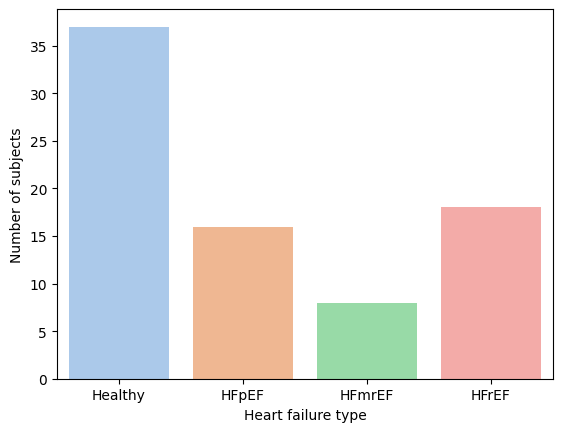

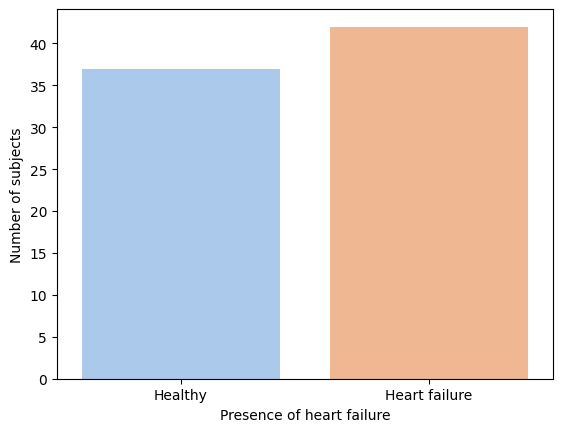

In [26]:
categories = ['Healthy', 'HFpEF', 'HFmrEF', 'HFrEF']
categories_bin = ['Healthy', 'Heart failure']

plt.figure()
ax = sns.countplot(x=y, palette='pastel')
ax.set_xticklabels(categories)
plt.xlabel("Heart failure type")
plt.ylabel("Number of subjects")

plt.figure()
ax = sns.countplot(x=y_bin, palette='pastel')
ax.set_xticklabels(categories_bin)
plt.xlabel("Presence of heart failure")
plt.ylabel("Number of subjects")

## Correlation Coefficients with target output

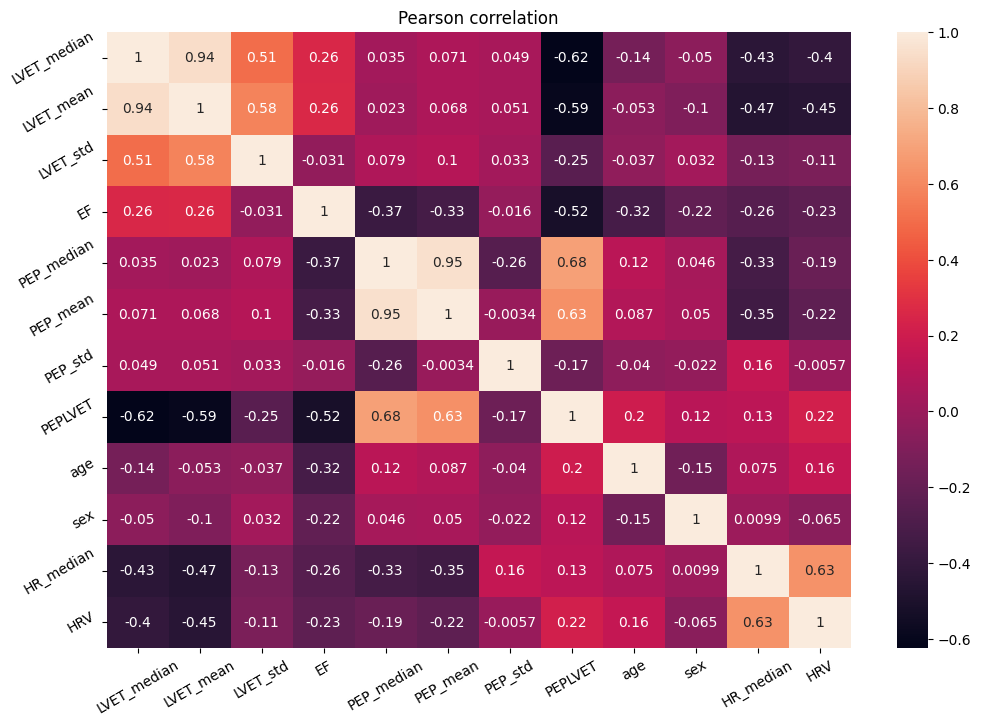

0.0034209904789665427


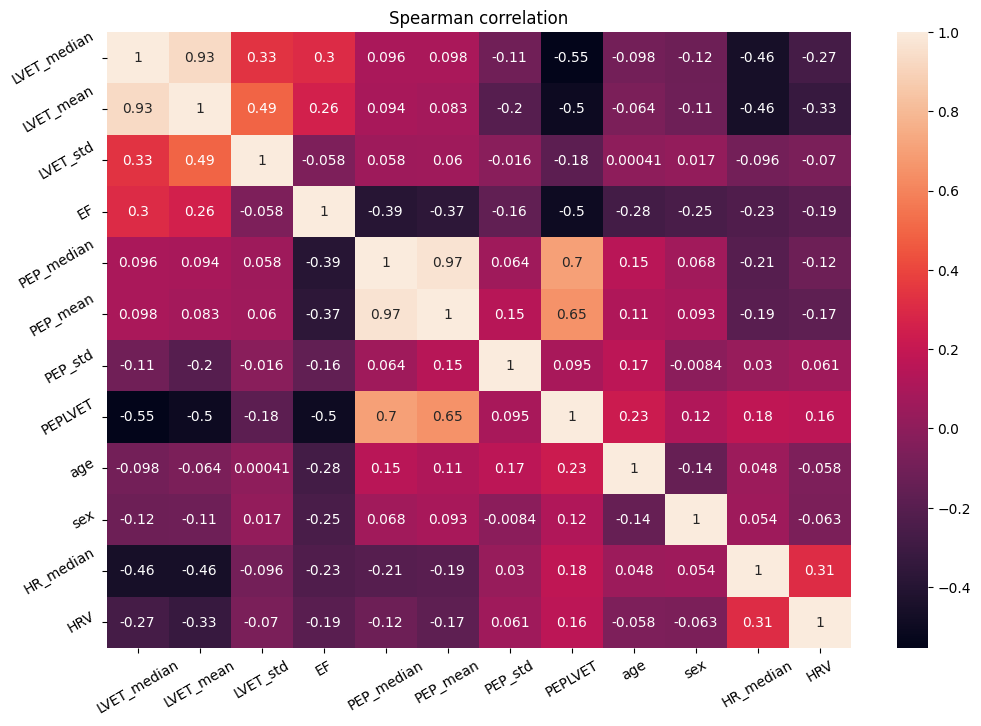

0.00041401064465908526


In [27]:
# Odredjivanje koeficijenta korelacije izmedju prediktora - matricni prikaz
fig, ax = plt.subplots(figsize=(12, 8))

fig = sns.heatmap(X.corr(), annot=True)
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.title("Pearson correlation")
plt.show()

print(np.min(abs(X.corr())))

# Odredjivanje koeficijenta korelacije izmedju prediktora - Spirman - matricni prikaz
fig, ax = plt.subplots(figsize=(12, 8))

fig = sns.heatmap(X.corr(method='spearman'), annot=True)
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.title("Spearman correlation")
plt.show()

print(np.min(abs(X.corr(method='spearman'))))

Pearson coefficients: 
LVET_median: -0.26725197204901446
LVET_mean: -0.22149045115794805
LVET_std: 0.10177950043425797
EF: -0.7292713304728935
PEP_median: 0.4258199387724903
PEP_mean: 0.3804461687671799
PEP_std: -0.07525282342967705
PEPLVET: 0.5265430083546203
age: 0.46849884628573935
sex: 0.09705151682996463
HR_median: 0.1599722527433937
HRV: 0.23758341176635459
13
12


C:\Users\masat\AppData\Local\Temp\ipykernel_9904\3411106183.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Feature', y='Correlation', palette='coolwarm')


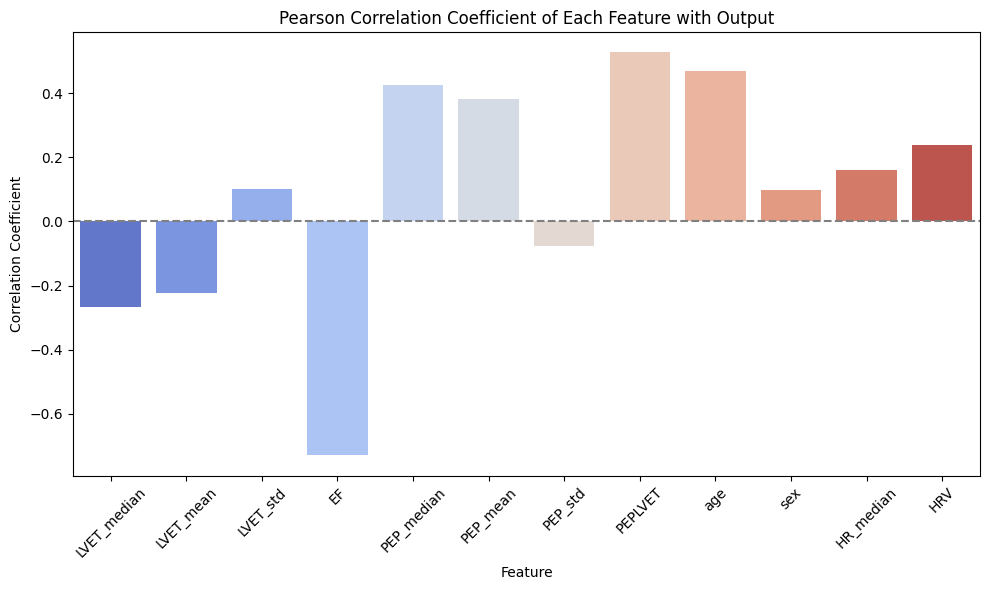

In [28]:
# Koeficijent korelacije izmedju prediktora i izlaza - ispis
column_names = data.columns[1:14]
coeffs = []
print('Pearson coefficients: ')
for i in range(0,len(column_names)-1):
    cc, p = pearsonr(data[column_names[i]],y_bin)
    coeffs.append(cc)
    print(column_names[i] + ': ' + str(cc))

print(len(column_names))
print(len(coeffs))

df = pd.DataFrame({'Feature': column_names[:-1], 'Correlation': coeffs})

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Feature', y='Correlation', palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Pearson Correlation Coefficient of Each Feature with Output')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Feature Importance from Permutation Testing

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

to_drop = ['LVET_mean', 'PEP_mean']
X = X.drop(columns=to_drop) # due to high correlation with LVET and PEP_median, they represent redundant information

numerical_features = ["LVET_median", "LVET_std", "EF", "PEP_median", "PEP_std", "PEPLVET", "age", "HR_median", "HRV"]  # Replace with your continuous features
categorical_features = ["sex"]  # Example categorical features

# Define transformations
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),  # Scale numeric
    ("cat", "passthrough", categorical_features)
])

# Apply transformations
X_transformed = preprocessor.fit_transform(X)

c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_sp

-0.007232142857142856
0.020857150501466314


c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


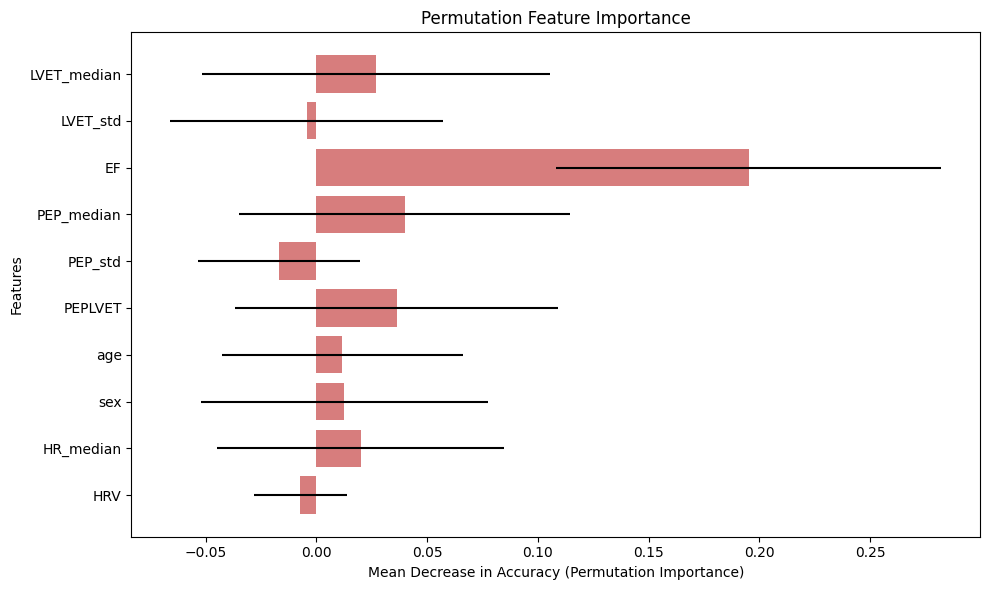

In [9]:
from sklearn.inspection import permutation_importance

X = X_transformed.copy()

# Prepare outer CV
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

model = LogisticRegression()

all_permutation_scores = []

for train_ix, test_ix in outer_cv.split(X, y):
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    
    # Perform hyperparameter tuning using inner 10-fold Stratified cross-validation
    param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
    grid_search = GridSearchCV(model, param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    
    # Permutation importance on outer test set
    result = permutation_importance(best_model, X_test, y_test, n_repeats=20, random_state=42, scoring='accuracy')
    all_permutation_scores.append(result.importances_mean)

# Convert to array
all_permutation_scores = np.array(all_permutation_scores)

# Average and std across folds
mean_importance = np.mean(all_permutation_scores, axis=0)
print(mean_importance[-1])
std_importance = np.std(all_permutation_scores, axis=0)
print(std_importance[-1])

feature_names = ["LVET_median", "LVET_std", "EF", "PEP_median", "PEP_std", "PEPLVET", "age", "sex", "HR_median", "HRV"]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, mean_importance, xerr=std_importance, align='center', alpha=0.8, color='indianred')
plt.xlabel("Mean Decrease in Accuracy (Permutation Importance)")
plt.ylabel("Features") 
plt.title("Permutation Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## LR classification and feature importance

c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\masat\AppData\Local\Programs\Python\P

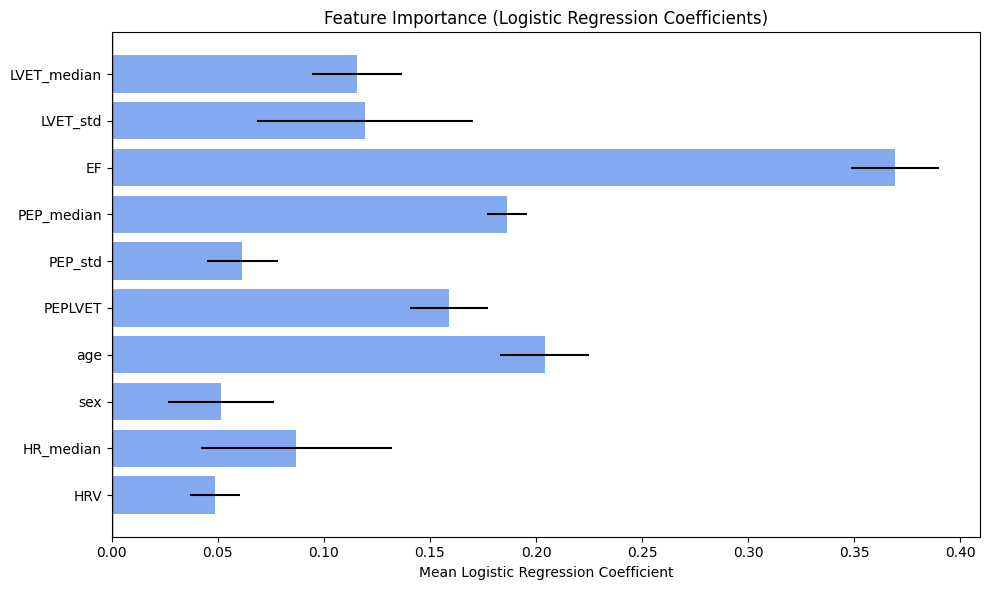

In [ ]:
X = X_transformed.copy()

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

all_coefficients = []

for train_ix, test_ix in outer_cv.split(X, y):
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    
    # Hyperparameter tuning with inner CV
    param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
    grid_search = GridSearchCV(model, param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    
    # Save coefficients
    all_coefficients.append(np.mean(np.abs(best_model.coef_), axis=0))  # shape: (n_features,)

# Convert to array
all_coefficients = np.array(all_coefficients)  # shape: (n_folds, n_features)

# Mean and std of coefficients
mean_coefs = np.mean(all_coefficients, axis=0)
std_coefs = np.std(all_coefficients, axis=0)

feature_names = ["LVET_median", "LVET_std", "EF", "PEP_median", "PEP_std", "PEPLVET", "age", "sex", "HR_median", "HRV"]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, mean_coefs, xerr=std_coefs, align='center', alpha=0.8, color='cornflowerblue')
plt.axvline(0, color='black', linewidth=1)  # Reference line at 0
plt.xlabel("Mean Logistic Regression Coefficient")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Random Forest feature importance

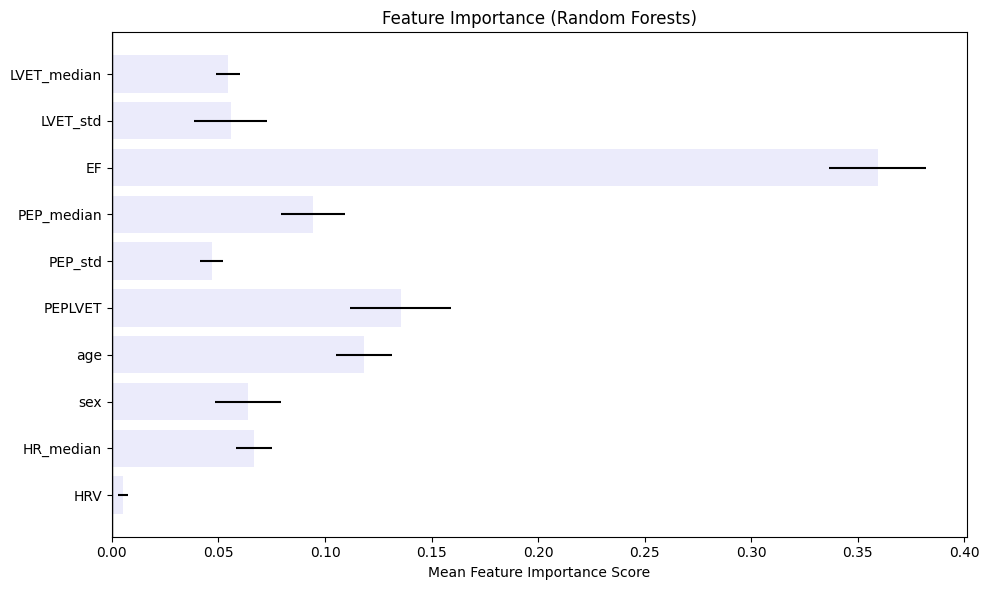

In [ ]:
X = X_transformed.copy()

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

model = LogisticRegression()

all_coefficients = []

for train_ix, test_ix in outer_cv.split(X, y):
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    
    # Perform hyperparameter tuning using inner 10-fold Stratified cross-validation
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 3, 5, 10]
    }
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, 
                               cv=inner_cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    
    # Save coefficients
    all_coefficients.append(best_model.feature_importances_)  # shape: (n_features,)

# Convert to array
all_coefficients = np.array(all_coefficients)  # shape: (n_folds, n_features)

# Mean and std of coefficients
mean_coefs = np.mean(all_coefficients, axis=0)
std_coefs = np.std(all_coefficients, axis=0)

feature_names = ["LVET_median", "LVET_std", "EF", "PEP_median", "PEP_std", "PEPLVET", "age", "sex", "HR_median", "HRV"]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, mean_coefs, xerr=std_coefs, align='center', alpha=0.8, color='lavender')
plt.axvline(0, color='black', linewidth=1)  # Reference line at 0
plt.xlabel("Mean Feature Importance Score")
plt.title("Feature Importance (Random Forests)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



## Feature Selection - Logistic Regression

c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Outer cross-validation results: [0.5625, 0.625, 0.5625, 0.5625, 0.4666666666666667]
Mean accuracy: 0.5558
Standard deviation: 0.0507
Outer cross-validation results: [0.5036458333333333, 0.43068181818181817, 0.5223214285714286, 0.40224358974358976, 0.27222222222222225]
Mean accuracy: 0.4262
Standard deviation: 0.0889
Outer cross-validation results: [0.5625, 0.625, 0.5625, 0.5625, 0.4666666666666667]
Mean accuracy: 0.5558
Standard deviation: 0.0507
Outer cross-validation results: [0.5266369047619047, 0.509046052631579, 0.525, 0.4491071428571428, 0.34385964912280703]
Mean accuracy: 0.4707
Standard deviation: 0.0694


c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\masat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

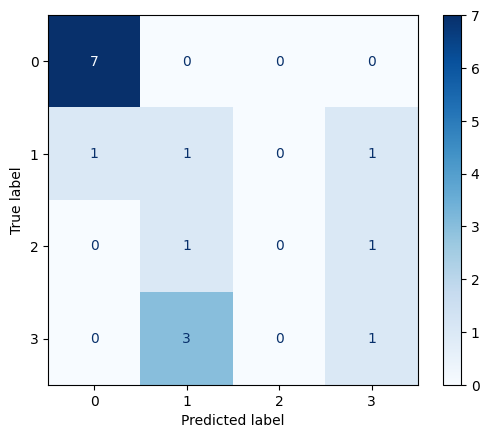

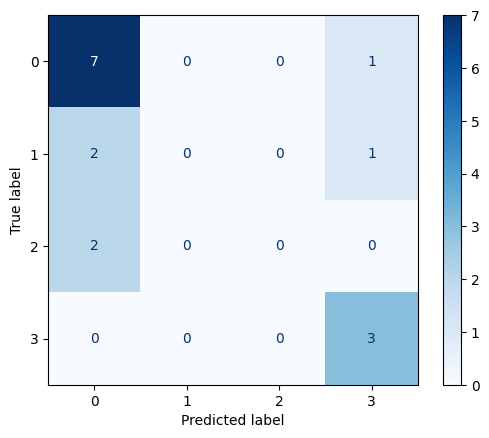

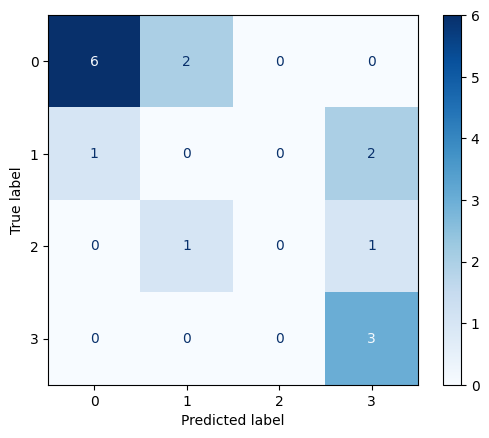

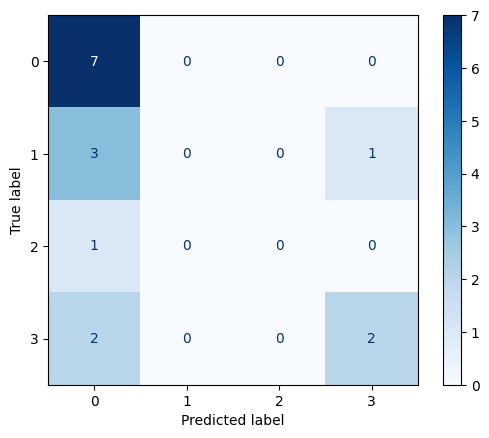

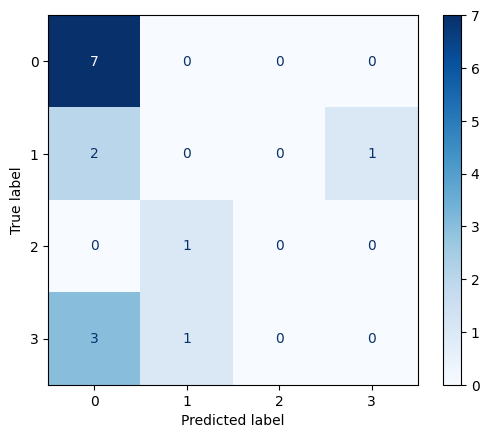

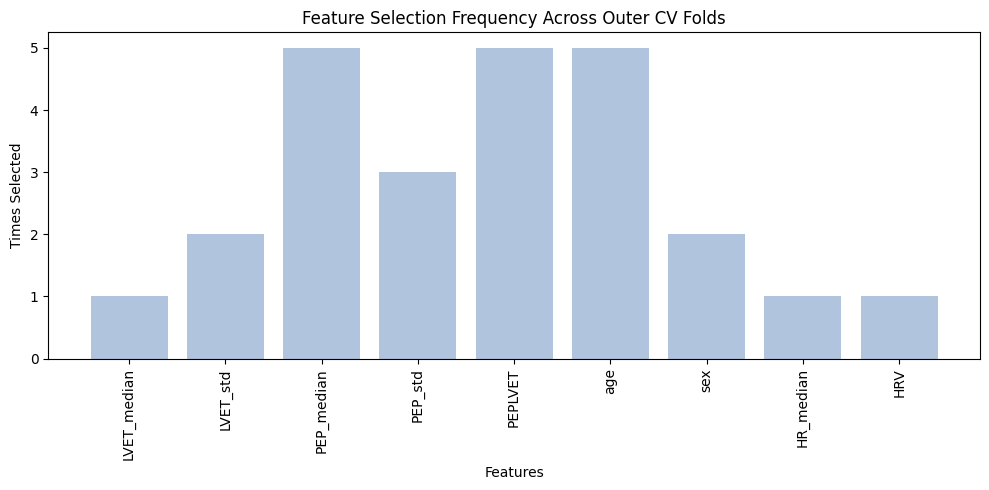

In [31]:
# Define the outer and inner cross-validation loops with Stratified K-Fold
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the model (Logistic Regression)
model = LogisticRegression()

# Perform double 5-fold cross-validation with feature selection
outer_results = []
precisions = []
f1scores = []
recalls = []

feature_counts = np.zeros(X_transformed.shape[1]-1)  # to count how often each feature is selected
feature_names = ["LVET_median", "LVET_std", "PEP_median", "PEP_std", "PEPLVET", "age", "sex", "HR_median", "HRV"]
class_names = ["class0", "class1", "class2", "class3"]
all_reports = {cls: {'precision': [], 'recall': [], 'f1-score': []} for cls in class_names}

# Define the number of top features to select
top_n_features = 5
X = X_transformed.copy()
X = np.delete(X, 2, axis=1)
for train_idx, test_idx in outer_cv.split(X, y):
    # Split the data into training and testing sets for the outer fold
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Feature selection using RFE
    rfe = RFE(estimator=model, n_features_to_select=top_n_features)
    X_train_selected = rfe.fit_transform(X_train, y_train)
    X_test_selected = rfe.transform(X_test)
    
    feature_counts += rfe.support_.astype(int)  # increment count if feature selected

    # Perform hyperparameter tuning using inner 10-fold Stratified cross-validation
    param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
    grid_search = GridSearchCV(model, param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_selected, y_train)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Evaluate the model on the outer test set
    y_pred = best_model.predict(X_test_selected)

    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    outer_results.append(accuracy)

    for cls in class_names:
        for metric in ['precision', 'recall', 'f1-score']:
            all_reports[cls][metric].append(report[cls][metric])
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1scores.append(f1_score(y_test, y_pred, average='weighted'))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')

# Print the results of the outer cross-validation
print(f"Outer cross-validation results: {outer_results}")
print(f"Mean accuracy: {np.mean(outer_results):.4f}")
print(f"Standard deviation: {np.std(outer_results):.4f}")

print(f"Outer cross-validation results: {precisions}")
print(f"Mean accuracy: {np.mean(precisions):.4f}")
print(f"Standard deviation: {np.std(precisions):.4f}")

print(f"Outer cross-validation results: {recalls}")
print(f"Mean accuracy: {np.mean(recalls):.4f}")
print(f"Standard deviation: {np.std(recalls):.4f}")

print(f"Outer cross-validation results: {f1scores}")
print(f"Mean accuracy: {np.mean(f1scores):.4f}")
print(f"Standard deviation: {np.std(f1scores):.4f}")

summary = pd.DataFrame(index=class_names, columns=['Precision (mean ± std)', 'Recall (mean ± std)', 'F1 (mean ± std)'])

for cls in class_names:
    precision = np.array(all_reports[cls]['precision'])
    recall = np.array(all_reports[cls]['recall'])
    f1 = np.array(all_reports[cls]['f1-score'])

    summary.loc[cls, 'Precision (mean ± std)'] = f"{precision.mean():.2f} ± {precision.std():.2f}"
    summary.loc[cls, 'Recall (mean ± std)'] = f"{recall.mean():.2f} ± {recall.std():.2f}"
    summary.loc[cls, 'F1 (mean ± std)'] = f"{f1.mean():.2f} ± {f1.std():.2f}"

# Plot feature selection frequency
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_counts)), feature_counts, tick_label=feature_names, color='lightsteelblue')
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Times Selected")
plt.title("Feature Selection Frequency Across Outer CV Folds")
plt.tight_layout()
plt.show()

In [32]:
print(summary)

       Precision (mean ± std) Recall (mean ± std) F1 (mean ± std)
class0            0.70 ± 0.14         0.93 ± 0.10     0.78 ± 0.08
class1            0.04 ± 0.08         0.07 ± 0.13     0.05 ± 0.10
class2            0.00 ± 0.00         0.00 ± 0.00     0.00 ± 0.00
class3            0.42 ± 0.24         0.55 ± 0.40     0.45 ± 0.28
